In [171]:
#Observations Made Based on the Data:
#1. Average fares are lowest in urban areas with a a considerably large amount of drivers. 
#The fares are most likely lower because the distances that need to be traveled in urban areas is low, thus 
#providing a boost in the number of trips that can be performed in a given amount of time. 

#2. Rural rides almost always place at the higher end of the cost spectrum. It is likely that the distances 
#to be traveled per ride are much longer than compraed to urban or suburban environments. The data
#indicates that there is also less concentration of drivers in rural areas. The scarcity of drivers and the
#presence of lengthier trips could be the major driving forces behind this phenomenon. 

#3. Urban: More Frequent Rides, Lower Cost Per Trip, Shorter Distances, Greater Amount of Drivers
#Suburban: Moderate Rides, Moderate Cost Per Trip, Moderate Distances, Moderate Amount of Drivers
#Rural: Infrequent Rides, Greater Cost Per Trip, Greater Distances, Fewer Drivers
#

In [172]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_to_load_df = pd.read_csv(city_data_to_load)
ride_data_to_load_df = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
combined_city_ride_df = pd.merge(ride_data_to_load_df, city_data_to_load_df, how = 'outer', on= 'city')
# Display the data table for preview
pd.DataFrame(combined_city_ride_df.head())

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

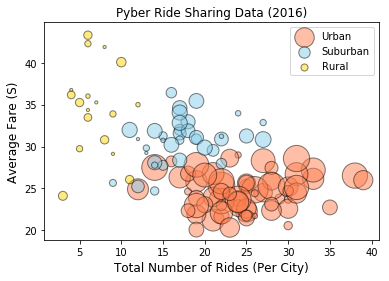

<Figure size 432x288 with 0 Axes>

In [173]:
# Obtain the x and y coordinates for each of the three city types
cities = combined_city_ride_df.groupby("city")
cityTypes = combined_city_ride_df["type"].drop_duplicates().tolist()

typeColors = pd.Series(["Coral","Skyblue","Gold"], index=cityTypes)

for tpe in cityTypes:
    cities = combined_city_ride_df[combined_city_ride_df["type"] == tpe].groupby("city")
    avg_cities = cities.mean()["fare"]
    total_rides = cities.count()["ride_id"]
    num_drivers = cities.head(1).set_index("city")["driver_count"]
    color = typeColors[tpe]
    plt.scatter(total_rides, avg_cities, c=color, marker="o", edgecolors="black",s=num_drivers*10, alpha=0.5)

# Build the scatter plots for each city types
#basic_scatter = plt.scatter(total_rides, avg_cities, marker="v", facecolors="red", edgecolors="black")
# Incorporate the other graph properties
#basic_scatter = 

# Create a legend
plt.legend(cityTypes)
# Incorporate a text label regarding circle size
plt.xlabel('Total Number of Rides (Per City)', fontsize=12)
plt.ylabel('Average Fare (S)', fontsize=12)
plt.title("Pyber Ride Sharing Data (2016)")
# Save Figure
fig = plt.figure()
fig.savefig('Pyber_RSD.png')

In [91]:
# Show plot
plt.show()

## Total Fares by City Type

{'Urban': 39854.38, 'Suburban': 19356.33, 'Rural': 4327.929999999999}


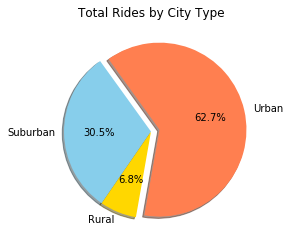

<Figure size 432x288 with 0 Axes>

In [174]:
# Calculate Type Percents
total_fares = combined_city_ride_df["ride_id"].count()
faretypes = {}
explode = [0.1, 0, 0]
labels = ["Urban", "Suburban", "Rural"]
colors = ["Coral", "Skyblue", "Gold"]
for tpe in cityTypes:
    faretypes[tpe] = combined_city_ride_df[combined_city_ride_df["type"] == tpe]["fare"].sum()

#print(total_fares)
print(faretypes)
# Build Pie Chart
plt.pie(faretypes.values(), explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=260)
plt.title("Total Rides by City Type")
# Save Figure
fig = plt.figure()
fig.savefig('RBCT.png')

In [112]:
# Show Figure
plt.show()

## Total Rides by City Type

{'Urban': 1625, 'Suburban': 625, 'Rural': 125}


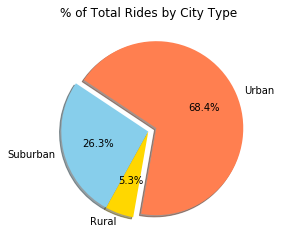

<Figure size 432x288 with 0 Axes>

In [175]:
# Calculate Ride Percents
# Calculate Type Percents
total_fares = combined_city_ride_df["ride_id"].count()
faretypes = {}
explode = [0.1, 0, 0]
labels = ["Urban", "Suburban", "Rural"]
colors = ["Coral", "Skyblue", "Gold"]
for tpe in cityTypes:
    faretypes[tpe] = len(combined_city_ride_df[combined_city_ride_df["type"] == tpe])

#print(total_fares)
print(faretypes)
# Build Pie Chart
plt.pie(faretypes.values(), explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=260)
plt.title("% of Total Rides by City Type")
# Save Figure

# Build Pie Chart

# Save Figure
fig = plt.figure()
fig.savefig('pctRCT')

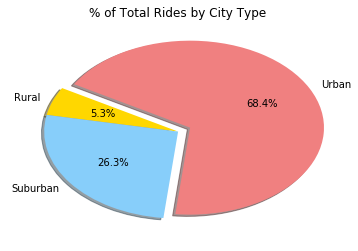

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

{'Urban': 2405, 'Suburban': 490, 'Rural': 78}


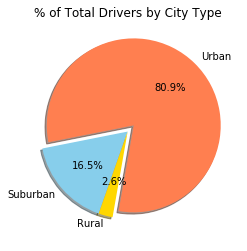

<Figure size 432x288 with 0 Axes>

In [176]:
# Calculate Ride Percents
# Calculate Type Percents
total_fares = combined_city_ride_df["ride_id"].count()
faretypes = {}
explode = [0.1, 0, 0]
labels = ["Urban", "Suburban", "Rural"]
colors = ["Coral", "Skyblue", "Gold"]
for tpe in cityTypes:
    faretypes[tpe] = combined_city_ride_df[combined_city_ride_df["type"] == tpe].loc[:,("city","driver_count")].drop_duplicates()["driver_count"].sum()

#print(total_fares)
print(faretypes)
# Build Pie Chart
plt.pie(faretypes.values(), explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=260)

plt.title("% of Total Drivers by City Type")
# Save Figure

# Build Pie Chart

# Save Figure
fig = plt.figure()
fig.savefig('pctTDCT.png')

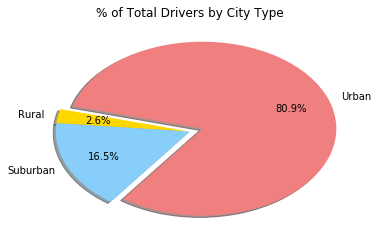

In [6]:
# Show Figure
plt.show()